# Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
import shap

# Load Data

In [4]:
data = pd.read_csv('../csv/entrada/FIFA_2018_Statistics.csv')

data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


# Model

In [5]:
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(train_X, train_y)

# Permutation Importance

In [6]:
# Calcular o Permutation Importance
perm_importance = permutation_importance(my_model, val_X, val_y, n_repeats=30, random_state=42)

# Criar um dicionário com os resultados
results_dict = {
    "Feature": val_X.columns,
    "Peso": perm_importance.importances_mean,
    "Desvio Padrão": perm_importance.importances_std
}

# Criar um DataFrame a partir do dicionário
results_df = pd.DataFrame(results_dict)

results_df.sort_values('Peso', ascending = False, inplace = True)

results_df

,Feature,Peso,Desvio Padrão
0,Goal Scored,0.159375,0.070040
12,Distance Covered (Kms),0.061458,0.039925
4,Off-Target,0.030208,0.027343
10,Pass Accuracy %,0.029167,0.029017
14,Yellow Card,0.023958,0.028736
3,On-Target,0.020833,0.060020
8,Free Kicks,0.020833,0.032609
13,Fouls Committed,0.019792,0.029628
5,Blocked,0.009375,0.024407
7,Offsides,0.003125,0.028356


# Shap Values

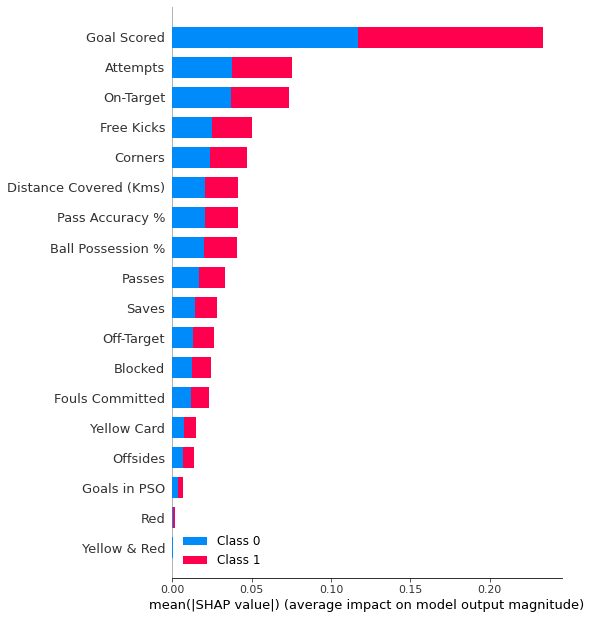

In [12]:
explainer = shap.Explainer(my_model)
shap_values = explainer.shap_values(val_X)

shap.summary_plot(shap_values, val_X)

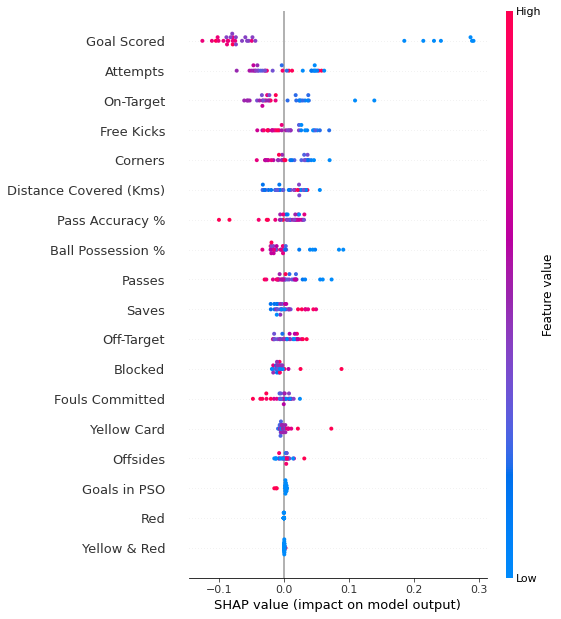

In [13]:
shap.summary_plot(shap_values[0], val_X)

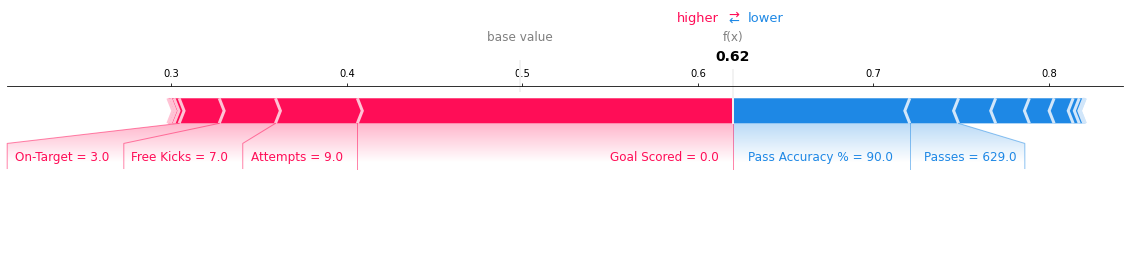

In [14]:
shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], val_X.iloc[0, :], matplotlib = True)